In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/third-one/practice.csv
/kaggle/input/csv-test/practice.csv
/kaggle/input/smalltest/practice.csv
/kaggle/input/secondtime/practice.csv
/kaggle/input/sigmas/sigma.png
/kaggle/input/greekalphabetpixels/practice.csv
/kaggle/input/alpha-photo/test_image.png


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
class_names = ['beta','chi','delta','gamma','Sigma','zeta','Xi','nu','Omega','epsilon','Lambda','xi','iota','rho',
'sigma','Delta','Gamma','pi','Phi','Upsilon','Psi','lambda','kappa','eta','psi','omega','upsilon','theta','alpha'
           ,'tau','phi']


In [4]:
fashion_file = '/kaggle/input/greekalphabetpixels/practice.csv'
df = pd.read_csv(fashion_file)

In [5]:
df

,Label,0,1,2,3,4,5,6,7,8,...,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599
0,0,247,247,247,247,247,247,247,247,247,...,247,247,247,247,247,247,247,247,247,247
1,0,237,231,229,225,220,216,214,212,208,...,187,187,187,187,187,187,187,186,186,186
2,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,30,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
501,30,255,255,254,254,254,254,254,254,254,...,255,255,255,255,255,255,255,255,255,255
502,30,254,255,255,254,255,253,254,255,253,...,255,255,255,255,255,255,255,255,255,255
503,30,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [6]:
y = np.array(df['Label'])
y 
x = df
x = x.drop(columns = 'Label')

In [7]:
num_images = len(df['Label'])
df.shape

(505, 3601)

In [8]:
x = np.array(x)
x
len(x[0])
x_shaped_array = x.reshape(505, 60, 60)
x_shaped_array = x_shaped_array/255
x_shaped_array.shape

(505, 60, 60)

In [9]:
x = x/255

In [10]:
image_pixels = x / 255
x_shaped_array.shape

(505, 60, 60)

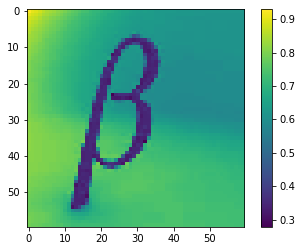

In [11]:
plt.figure()
plt.imshow(x_shaped_array[5])
plt.colorbar()
plt.grid(False)
plt.show()

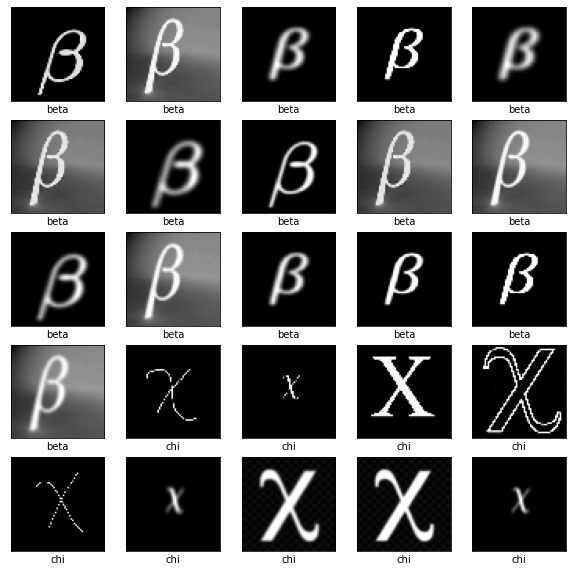

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_shaped_array[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y[i]])
plt.show()

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(60, 60)),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(100),
 
   
])





In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(x_shaped_array, y, epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 5ms/step - loss: 4.9068 - accuracy: 0.0376
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 3.7491 - accuracy: 0.0990
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 3.4075 - accuracy: 0.1564
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 3.1692 - accuracy: 0.2139
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 3.0359 - accuracy: 0.2257
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 2.9767 - accuracy: 0.2257
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 2.8874 - accuracy: 0.2535
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 2.8385 - accuracy: 0.2634
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 2.7313 - accuracy: 0.3168
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 2.6691 - accuracy: 0.3188
Epoch 11/

In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(([x_shaped_array]))

In [18]:
predictions

array([[9.8420668e-01, 2.0957326e-05, 4.0877043e-05, ..., 5.0307458e-10,
        1.3291971e-09, 6.5418884e-09],
       [8.6251795e-01, 9.4970979e-04, 1.8163106e-03, ..., 1.7740274e-07,
        5.9988020e-07, 2.1030253e-06],
       [8.5523742e-01, 1.4924519e-05, 5.0991517e-03, ..., 1.2958332e-10,
        2.6243036e-10, 1.0951130e-09],
       ...,
       [1.6844591e-05, 2.1120287e-04, 6.4622535e-04, ..., 6.1724346e-09,
        6.8161870e-07, 1.6640615e-07],
       [4.9749279e-04, 1.1781663e-04, 5.0163188e-04, ..., 1.0058651e-07,
        2.9093073e-07, 1.0182545e-06],
       [7.2946551e-04, 1.7281571e-04, 6.8318786e-04, ..., 1.2666329e-07,
        3.7802849e-07, 1.3576456e-06]], dtype=float32)

In [19]:
class_names[np.argmax(predictions[20])]

'chi'

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

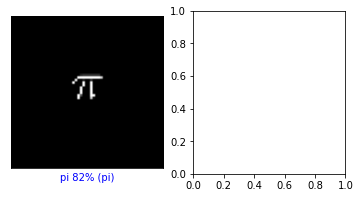

In [21]:
i = 290
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y, x_shaped_array)
plt.subplot(1,2,2)
# plot_value_array(i, predictions[i],  y)
plt.show()

In [22]:
#load in picture and make it usable

#Load image here

# load the image
#Change Filepath Here
img = load_img('../input/sigmas/sigma.png', target_size = (60,60) ,color_mode = 'grayscale')
print(type(img))
# convert to numpy array
img_array = img_to_array(img)



print(img_array.dtype)
print(img_array.shape)

<class 'PIL.Image.Image'>
float32
(60, 60, 1)


In [23]:
img = (np.expand_dims(img,0))
img.shape

(1, 60, 60)

In [24]:
predictions = probability_model.predict((img))

In [25]:
results = class_names[np.argmax(predictions[0])]
print("\\" + results)

\Upsilon


In [26]:
model.save_weights('my_model_weights.h5')